<a href="https://www.kaggle.com/code/zeeshanahmadyar/heart-disease-prediction-using-machine-learning?scriptVersionId=289508904" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import random
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# **Generate new data**

In [2]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.968521,-0.653921,1.539867,-1.578099,-2.446477,0
1,-0.073169,-1.717026,-3.002073,0.744929,2.358576,1
2,3.435583,2.090626,-0.081134,-0.495426,1.966683,1
3,1.148695,3.564782,-1.405964,1.104707,-0.723635,1
4,0.830795,2.193893,0.115400,-0.490706,0.595681,1


# **Now we create functions for sampling datasets**

In [3]:
# function for row sampling
def sample_rows(df, percent):
    return df.sample(int(percent*df.shape[0]), replace=True)

In [4]:
# function for feature sampling
def sample_features(df, percent):
    features = df.columns.tolist()[:-1] # exclude target
    k = int(percent * len(features))
    selected_features = random.sample(features, k)

    new_df = df[selected_features].copy() #You are telling Pandas: “I want a real copy, not a view.”
    new_df['target'] = df['target']
    return new_df

In [5]:
# function for combining sampling
def combine_sampling(df, row_percent, col_percent):
    new_df = sample_rows(df, row_percent)
    return sample_features(new_df, col_percent)

In [6]:
# sample rows
sample_rows(df, 0.1)

,col1,col2,col3,col4,col5,target
14,0.248328,1.029195,1.387490,-1.713042,-0.877266,0
75,0.597396,2.097670,-0.369485,-1.352293,-0.061460,1
32,0.194711,1.088573,1.089102,-1.353243,-0.647510,0
74,3.384175,2.387147,0.152334,0.447066,-0.644217,1
12,-0.779396,1.308049,-3.412772,1.615796,0.008116,1
87,1.297392,0.988548,-1.185764,0.089111,1.521509,1
19,1.700204,0.922068,-0.361232,-0.246970,-0.041388,0
76,2.202185,1.442411,3.309401,-2.054679,-2.544638,0
25,-1.382664,1.652945,-1.264077,0.649650,-1.005274,1
81,0.560965,0.457970,-1.643770,0.623776,1.321574,1


In [7]:
df1 = sample_rows(df, 0.1)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

# **Create Model Instance**

In [8]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [9]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

In [10]:
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])

DecisionTreeClassifier()

In [11]:
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[3] <= -0.082\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 2.276\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

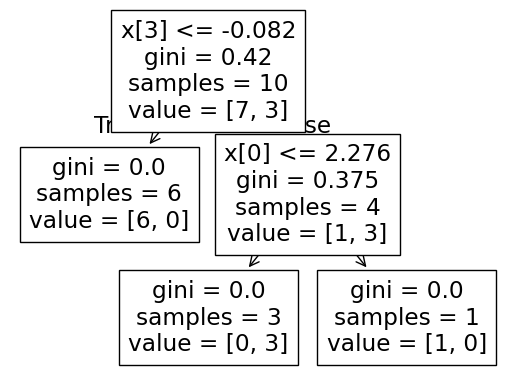

In [12]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[1] <= 2.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 3.553\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

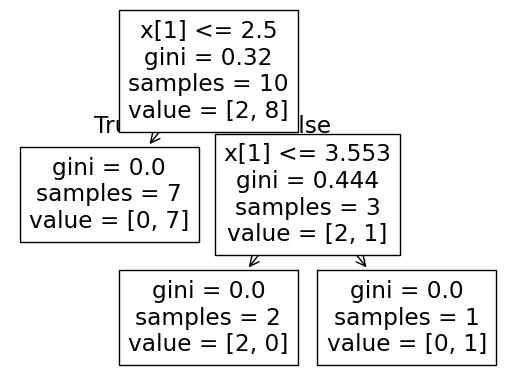

In [13]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.901\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[0] <= 1.823\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7, 0.6666666666666667, '  False')]

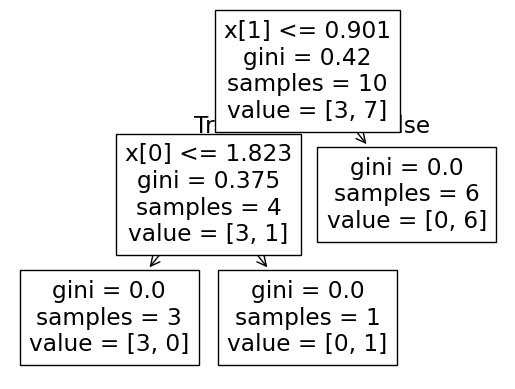

In [14]:
plot_tree(clf3)

In [15]:
clf1.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([0])

In [16]:
clf2.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([1])

In [17]:
clf3.predict(np.array([2.597906, 1.225795, -1.693532, 1.137272]).reshape(1, 4))

array([1])

# **Features Sampling**

In [18]:
df1 = sample_features(df, 0.8)
df2 = sample_features(df, 0.8)
df3 = sample_features(df, 0.8)

In [19]:
sample_features(df, 0.8)

,col3,col1,col2,col5,target
0,1.539867,-0.968521,-0.653921,-2.446477,0
1,-3.002073,-0.073169,-1.717026,2.358576,1
2,-0.081134,3.435583,2.090626,1.966683,1
3,-1.405964,1.148695,3.564782,-0.723635,1
4,0.115400,0.830795,2.193893,0.595681,1
...,...,...,...,...,...
95,-0.212602,3.270509,1.059351,1.578733,1
96,-2.087912,-1.113461,0.814898,-0.334388,1
97,4.427656,0.754019,1.966720,-2.286650,0
98,-1.423681,2.324876,0.318323,-0.891763,1


In [20]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [21]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

In [22]:
clf2.fit(df2.iloc[:, 0:4], df2.iloc[:, -1])

DecisionTreeClassifier()

In [23]:
clf3.fit(df3.iloc[:, 0:4], df3.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.5394736842105263, 0.9375, 'x[3] <= 0.507\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.2894736842105263, 0.8125, 'x[1] <= 0.544\ngini = 0.371\nsamples = 61\nvalue = [15, 46]'),
 Text(0.4144736842105263, 0.875, 'True  '),
 Text(0.10526315789473684, 0.6875, 'x[2] <= 0.22\ngini = 0.487\nsamples = 31\nvalue = [13, 18]'),
 Text(0.05263157894736842, 0.5625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.15789473684210525, 0.5625, 'x[3] <= -0.999\ngini = 0.403\nsamples = 25\nvalue = [7.0, 18.0]'),
 Text(0.10526315789473684, 0.4375, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.21052631578947367, 0.4375, 'x[2] <= 2.01\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.15789473684210525, 0.3125, 'x[0] <= 3.797\ngini = 0.346\nsamples = 9\nvalue = [7, 2]'),
 Text(0.10526315789473684, 0.1875, 'x[2] <= 0.247\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.05263157894736842, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.0625, 

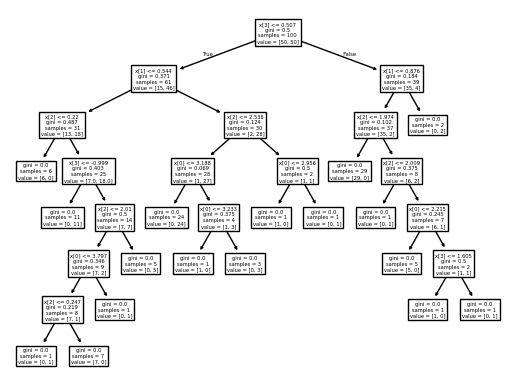

In [24]:
plot_tree(clf1)

[Text(0.6477272727272727, 0.9444444444444444, 'x[0] <= 0.507\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.38636363636363635, 0.8333333333333334, 'x[3] <= 0.433\ngini = 0.371\nsamples = 61\nvalue = [15, 46]'),
 Text(0.5170454545454546, 0.8888888888888888, 'True  '),
 Text(0.18181818181818182, 0.7222222222222222, 'x[2] <= 0.333\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(0.09090909090909091, 0.6111111111111112, 'x[1] <= 2.342\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.045454545454545456, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.13636363636363635, 0.5, 'x[3] <= -0.188\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.6111111111111112, 'x[0] <= -1.0\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.22727272727272727, 0.5, 'gini = 0.0\ns

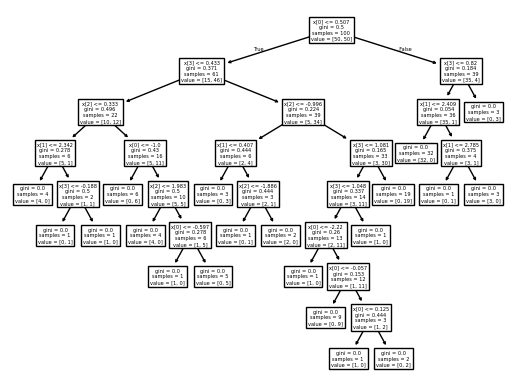

In [25]:
plot_tree(clf2)

[Text(0.5119047619047619, 0.9285714285714286, 'x[1] <= 0.433\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.30952380952380953, 0.7857142857142857, 'x[3] <= 0.544\ngini = 0.352\nsamples = 57\nvalue = [44, 13]'),
 Text(0.4107142857142857, 0.8571428571428572, 'True  '),
 Text(0.19047619047619047, 0.6428571428571429, 'x[0] <= 2.068\ngini = 0.156\nsamples = 47\nvalue = [43, 4]'),
 Text(0.09523809523809523, 0.5, 'x[3] <= -0.168\ngini = 0.049\nsamples = 40\nvalue = [39, 1]'),
 Text(0.047619047619047616, 0.35714285714285715, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.14285714285714285, 0.35714285714285715, 'x[2] <= 1.722\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.09523809523809523, 0.21428571428571427, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.19047619047619047, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.5, 'x[1] <= -1.67\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.23809523809523808, 0.357142857

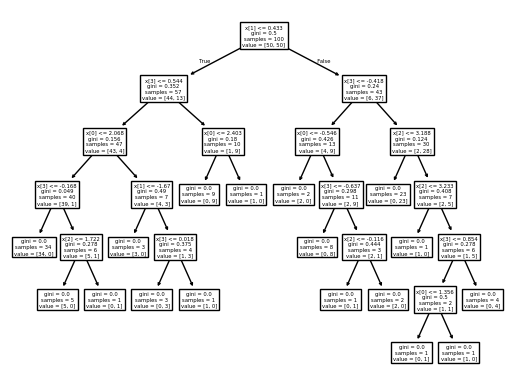

In [26]:
plot_tree(clf3)

In [27]:
clf1.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([1])

In [28]:
clf2.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([0])

In [29]:
clf3.predict(np.array([-0.261377, 0.971549, -0.580485, -0.122533]).reshape(1, 4))

array([1])

# ***Bagging Vs RandomForest***

In [30]:
X, y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [31]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
df['target'] = y

In [32]:
print(df.shape)

(100, 6)


In [33]:
df.head()

,col1,col2,col3,col4,col5,target
0,-1.357392,-1.763429,-1.019294,1.579846,-0.429679,0
1,1.963893,0.240987,0.120676,-0.037128,1.434273,0
2,-0.749935,-1.248856,-1.017298,0.311736,-1.433854,0
3,-0.674739,-0.551105,-1.525765,0.922203,-2.757104,0
4,-0.096283,1.048007,-0.777713,0.624587,-1.296878,1


# **Bagging Ensemble**

In [34]:
bag = BaggingClassifier(max_features=2)
bag.fit(df.iloc[:, :5], df.iloc[:, -1])

BaggingClassifier(max_features=2)

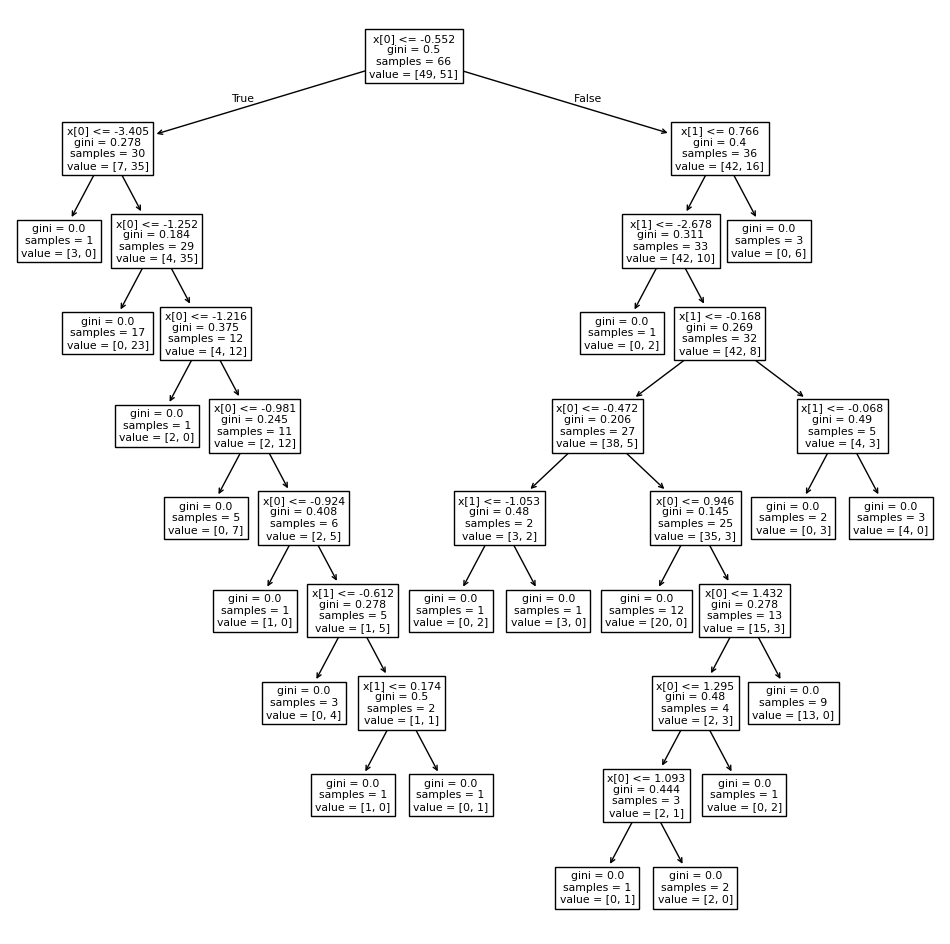

In [35]:
plt.figure(figsize=(12, 12))
plot_tree(bag.estimators_[0])
plt.show() # Only 2 cols show because we can choose max_features=2

# ***RandomForestClassfier***

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(df.iloc[:, :5], df.iloc[:, -1])

RandomForestClassifier()

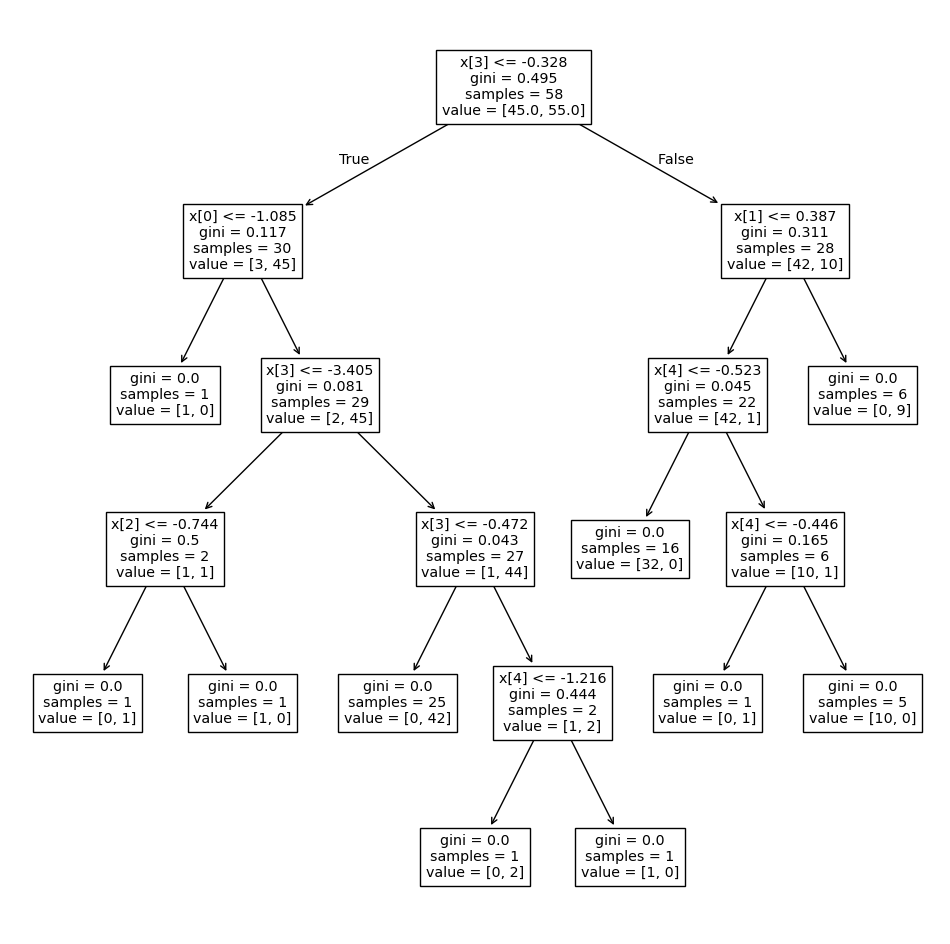

In [38]:
plt.figure(figsize=(12, 12))
plot_tree(rfc.estimators_[1])
plt.show()

# ***Hyperparameter Tuning***
> We can check the best hyperparameter by using  GridSearchCV and RandomizeSearchCV

In [39]:
df1 = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
df.shape

(100, 6)

In [41]:
X = df1.iloc[:, 0:-1]
y = df1.iloc[:, -1]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [43]:
rf = RandomForestClassifier()

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
y_pred = rf.predict(X_test)

In [46]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9902597402597403


In [47]:
gb = GradientBoostingClassifier()
svc = SVC(probability=True)
lr = LogisticRegression()

In [48]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [49]:
y_pred_gb = gb.predict(X_test)

In [50]:
print('Accuracy Gradient Boosting:', accuracy_score(y_test, y_pred_gb))

Accuracy Gradient Boosting: 0.9512987012987013


In [51]:
svc.fit(X_train, y_train)

SVC(probability=True)

In [52]:
y_pred_svc = svc.predict(X_test)

In [53]:
print('Accuracy SVC:', accuracy_score(y_test, y_pred_svc))

Accuracy SVC: 0.6753246753246753


In [54]:
lr.fit(X_train, y_train)

LogisticRegression()

In [55]:
y_pred_lr = lr.predict(X_test)

In [56]:
print('Accuracy Logistic Regression:', accuracy_score(y_test, y_pred_lr))

Accuracy Logistic Regression: 0.8181818181818182


In [57]:
models_accuracy = {
    'GradientBoosting': 0.9512987012987013,
    'SVC': 0.6753246753246753,
    'LogisticRegression': 0.8181818181818182
}

# **Sort the model score**

In [58]:
sorted_score = sorted(models_accuracy.items(), key=lambda x: x[1], reverse=True)

In [59]:
for rank, (name, score) in enumerate(sorted_score, start=1):
    print(f'{rank} --> {name}: {np.round(score, 2)}')

1 --> GradientBoosting: 0.95
2 --> LogisticRegression: 0.82
3 --> SVC: 0.68


# **Checking by Cross Validation**

In [60]:
np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.9970588235294118)

# **Grid Search CV**
> ***Find the best hyperparameter for the Model by using GridSearchCV***

In [61]:
n_estimators = [20, 50, 100, 150]
max_features = [0.2, 0.6, 1.0]
max_depth = [2, 8, None]
max_samples = [0.5, 0.75, 1.0]

In [62]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'max_samples': max_samples
}

In [63]:
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, verbose=2, n_jobs=-1)

In [64]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=150; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=150; total time=   0.5s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.1s

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 50, 100, 150]},
             verbose=2)

In [65]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.75,
 'n_estimators': 150}